[View in Colaboratory](https://colab.research.google.com/github/snazzybloke/tutorial_1/blob/master/Kaggle_house_price_prediction_kernel.ipynb)

# Introduction
**This will be your workspace for the [Machine Learning course](https://www.kaggle.com/learn/machine-learning).**

You will need to translate the concepts to work with the data in this notebook, the Iowa data. Each page in the Machine Learning course includes instructions for what code to write at that step in the course.

# Write Your Code Below

In [10]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving train.csv.gz to train.csv.gz
Saving test.csv.gz to test.csv (1).gz
User uploaded file "train.csv.gz" with length 91387 bytes
User uploaded file "test.csv.gz" with length 83948 bytes


In [11]:
uploaded.keys()

dict_keys(['train.csv.gz', 'test.csv.gz'])

In [27]:
import pandas as pd
#import pathlib
import io, gzip

# main_file_path = '../input/house-prices-advanced-regression-techniques/train.csv' # this is the path to the Iowa data that you will use
# data = pd.read_csv(io.StringIO(uploaded['train.csv'].decode('utf-8')))  # this should work for *.csv, but not if it is gzipped
dfile = gzip.GzipFile(fileobj=io.BytesIO(uploaded['train.csv.gz']))
data = pd.read_csv(dfile)

# Run this code block with the control-enter keys on your keyboard. Or click the blue botton on the left
print('Some output from running this cell')

print(data.describe())

Some output from running this cell
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066

In [28]:
print(data.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [29]:
iowa_home_price = data['SalePrice']
iowa_home_price.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [30]:
two_columns = data[['LotArea', 'BedroomAbvGr']]
two_columns.describe()

,LotArea,BedroomAbvGr
count,1460.000000,1460.000000
mean,10516.828082,2.866438
std,9981.264932,0.815778
min,1300.000000,0.000000
25%,7553.500000,2.000000
50%,9478.500000,3.000000
75%,11601.500000,3.000000
max,215245.000000,8.000000


In [31]:
from sklearn.tree import DecisionTreeRegressor
iowa_model = DecisionTreeRegressor()

y = iowa_home_price
X = data[['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']]
iowa_model.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [32]:
print(X.head(1234).head())

   LotArea  YearBuilt  1stFlrSF  2ndFlrSF  FullBath  BedroomAbvGr  \
0     8450       2003       856       854         2             3   
1     9600       1976      1262         0         2             3   
2    11250       2001       920       866         2             3   
3     9550       1915       961       756         1             3   
4    14260       2000      1145      1053         2             4   

   TotRmsAbvGrd  
0             8  
1             6  
2             6  
3             7  
4             9  


In [33]:
print(iowa_model.predict(X.head(1234).head()),'\n', y.head(1234).head())

[208500. 181500. 223500. 140000. 250000.] 
 0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64


In [34]:
from sklearn.metrics import mean_absolute_error
yP = iowa_model.predict(X)
mean_absolute_error(y, yP)

62.35433789954339

In [35]:
from sklearn.model_selection import train_test_split
Xt, Xv, yt, yv = train_test_split(X, y, random_state=0)
iowa_model.fit(Xt, yt)
yP = iowa_model.predict(Xv)
mean_absolute_error(yv, yP)

32627.70410958904

In [37]:
def get_mae(dt_leaf_nodes, train_preds, val_preds, train_targ, val_targ):
    model = DecisionTreeRegressor(max_leaf_nodes=dt_leaf_nodes, random_state=0)
    model.fit(train_preds, train_targ)
    yP = model.predict(val_preds)
    mae = mean_absolute_error(val_targ, yP)
    return mae

for leaf_nodes in [5, 50, 500, 5000]:
    print("Max leaf nodes: {}, MAError {}".format(leaf_nodes, get_mae(leaf_nodes, Xt, Xv, yt, yv)))
    

Max leaf nodes: 5, MAError 35190.33670788684
Max leaf nodes: 50, MAError 27825.888386265695
Max leaf nodes: 500, MAError 32662.00407479887
Max leaf nodes: 5000, MAError 33382.79452054795


In [38]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(Xt, yt)
yP = rf.predict(Xv)
mean_absolute_error(yv, yP)

24410.856986301373

In [40]:
# test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
# Test = pd.read_csv(main_file_path / pathlib.Path('test.csv.gz'))
dfile = gzip.GzipFile(fileobj=io.BytesIO(uploaded['test.csv.gz']))
Test = pd.read_csv(dfile)
XT = Test[['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']]
yT = rf.predict(XT)
yT

array([139440. , 154640. , 189030. , ..., 141511.4, 126800. , 220350. ])

In [41]:
# low score achieved with the above. Now re-doing it all properly:
y_train = data['SalePrice']
data = data.drop('SalePrice', axis=1)
data['Training'] = True
Test['Training'] = False
full_data = pd.concat([data, Test])
full_data = full_data.set_index('Id')
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-null object
Exterior2nd      2918 non

In [42]:
# get rid of columns with majority NaN values:
full_data.columns[full_data.isnull().sum().gt(2000)]

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [43]:
full_data = full_data.drop(['Alley', 'Fence', 'MiscFeature', 'PoolQC'], axis=1)
# fill missing numerical values
full_data = full_data.interpolate()
# OneHotEncoder for categorical:
full_data = pd.get_dummies(full_data)
full_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [0]:
X_train = full_data[full_data['Training']==True].drop('Training', axis=1)
X_Test = full_data[full_data['Training']==False].drop('Training', axis=1)

rfr = RandomForestRegressor(n_estimators=1000, random_state=1, n_jobs=-1)

rfr.fit(X_train, y_train)
y_Predicted = rfr.predict(X_Test)

In [45]:
import numpy as np
fimportance = rfr.feature_importances_
indices = np.argsort(fimportance)[::-1]
for i in range(full_data.shape[1]-1):
    print("{:3d}) {:30s} {:.5f}".format(i+1, full_data.columns[indices[i]], fimportance[indices[i]]))

  1) OverallQual                    0.58206
  2) GrLivArea                      0.10864
  3) TotalBsmtSF                    0.04069
  4) 2ndFlrSF                       0.03529
  5) BsmtFinSF1                     0.02748
  6) 1stFlrSF                       0.02220
  7) GarageCars                     0.02070
  8) GarageArea                     0.01492
  9) LotArea                        0.01285
 10) YearBuilt                      0.00880
 11) TotRmsAbvGrd                   0.00720
 12) YearRemodAdd                   0.00648
 13) LotFrontage                    0.00628
 14) BsmtUnfSF                      0.00522
 15) FullBath                       0.00522
 16) OpenPorchSF                    0.00469
 17) MasVnrArea                     0.00463
 18) WoodDeckSF                     0.00455
 19) GarageYrBlt                    0.00437
 20) OverallCond                    0.00415
 21) Foundation_Wood                0.00341
 22) MoSold                         0.00340
 23) Fireplaces                 

In [46]:
full_data.columns[275]

'SaleCondition_Partial'

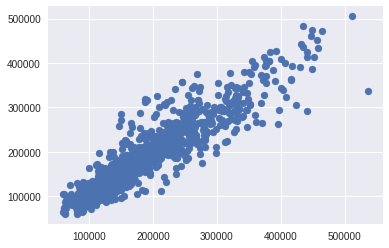

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(y_Predicted, yT)

In [52]:
Top100 = X_train.columns[indices[:100]]
X_train[Top100].values.shape

(1460, 100)

In [55]:
#!pip install TPOT
from tpot import TPOTRegressor

tpotr = TPOTRegressor(generations=20, population_size=30, cv=5, scoring='neg_mean_absolute_error', \
                      n_jobs=-1, max_time_mins=120, verbosity=2)
Top100 = X_train.columns[indices[:100]]
Xt = X_train[Top100].values
yt = y_train.values
tpotr.fit(Xt, yt)

Optimization Progress: 100%|██████████| 60/60 [01:32<00:00,  1.29s/pipeline]

Generation 1 - Current best internal CV score: -17013.759496507046


Optimization Progress: 91pipeline [07:14,  5.07s/pipeline]

Generation 2 - Current best internal CV score: -16804.607137045376


Optimization Progress: 121pipeline [08:05,  1.82s/pipeline]

Generation 3 - Current best internal CV score: -16506.264359132627


Optimization Progress: 151pipeline [09:05,  1.63s/pipeline]

Generation 4 - Current best internal CV score: -15264.981559140573


Optimization Progress: 181pipeline [12:19,  5.61s/pipeline]

Generation 5 - Current best internal CV score: -15264.981559140573


Optimization Progress: 211pipeline [13:42,  2.46s/pipeline]

Generation 6 - Current best internal CV score: -15264.981559140573


Optimization Progress: 241pipeline [16:23,  3.36s/pipeline]

Generation 7 - Current best internal CV score: -14867.393722920742


Optimization Progress: 271pipeline [19:27,  5.56s/pipeline]

Generation 8 - Current best internal CV score: -14792.522441992827


Optimization Progress: 301pipeline [21:59,  8.00s/pipeline]

Generation 9 - Current best internal CV score: -14792.522441992827


Optimization Progress: 332pipeline [28:46, 10.73s/pipeline]

Generation 10 - Current best internal CV score: -14792.522441992827


Optimization Progress: 362pipeline [30:59,  4.68s/pipeline]

Generation 11 - Current best internal CV score: -14695.287111431835


Optimization Progress: 392pipeline [33:15,  4.19s/pipeline]

Generation 12 - Current best internal CV score: -14695.287111431835


Optimization Progress: 422pipeline [35:43,  4.12s/pipeline]

Generation 13 - Current best internal CV score: -14695.287111431835


Optimization Progress: 452pipeline [46:27, 14.70s/pipeline]

Generation 14 - Current best internal CV score: -14695.287111431835


Optimization Progress: 482pipeline [48:31,  3.76s/pipeline]

Generation 15 - Current best internal CV score: -14695.287111431835


Optimization Progress: 512pipeline [54:40, 17.39s/pipeline]

Generation 16 - Current best internal CV score: -14651.583524885844


Optimization Progress: 544pipeline [1:01:58, 11.87s/pipeline]

Generation 17 - Current best internal CV score: -14651.583524885844


Optimization Progress: 574pipeline [1:04:23,  4.59s/pipeline]

Generation 18 - Current best internal CV score: -14651.583524885844


Optimization Progress: 604pipeline [1:06:22,  3.90s/pipeline]

Generation 19 - Current best internal CV score: -14602.257051565557


Optimization Progress: 634pipeline [1:08:32,  3.68s/pipeline]

Generation 20 - Current best internal CV score: -14602.257051565557


Optimization Progress: 664pipeline [1:10:33,  4.32s/pipeline]

Generation 21 - Current best internal CV score: -14602.257051565557


Optimization Progress: 694pipeline [1:13:14,  4.61s/pipeline]

Generation 22 - Current best internal CV score: -14550.201511978148


Optimization Progress: 724pipeline [1:15:23,  3.41s/pipeline]

Generation 23 - Current best internal CV score: -14529.161903025113


Optimization Progress: 754pipeline [1:18:21,  5.20s/pipeline]

Generation 24 - Current best internal CV score: -14478.684822023808


Optimization Progress: 784pipeline [1:20:49,  4.49s/pipeline]

Generation 25 - Current best internal CV score: -14478.684822023808


Optimization Progress: 814pipeline [1:23:58,  5.73s/pipeline]

Generation 26 - Current best internal CV score: -14442.130311586758


Optimization Progress: 844pipeline [1:27:13,  5.99s/pipeline]

Generation 27 - Current best internal CV score: -14442.130311586758


Optimization Progress: 874pipeline [1:29:52,  4.76s/pipeline]

Generation 28 - Current best internal CV score: -14442.130311586758


Optimization Progress: 905pipeline [1:37:02,  8.07s/pipeline]

Generation 29 - Current best internal CV score: -14435.815558895954


Optimization Progress: 935pipeline [1:39:59,  5.04s/pipeline]

Generation 30 - Current best internal CV score: -14435.815558895954


Optimization Progress: 966pipeline [1:50:37, 16.66s/pipeline]

Generation 31 - Current best internal CV score: -14325.90228515166


Optimization Progress: 996pipeline [1:54:54,  6.04s/pipeline]

Generation 32 - Current best internal CV score: -14325.90228515166


Optimization Progress: 1026pipeline [1:57:46,  4.75s/pipeline]

Generation 33 - Current best internal CV score: -14325.90228515166



124.15082696666667 minutes have elapsed. TPOT will close down.
TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: ExtraTreesRegressor(LassoLarsCV(ElasticNetCV(ElasticNetCV(input_matrix, l1_ratio=0.45, tol=1e-05), l1_ratio=0.6000000000000001, tol=0.01), normalize=True), bootstrap=False, max_features=0.8500000000000001, min_samples_leaf=1, min_samples_split=9, n_estimators=100)


TPOTRegressor(config_dict={'sklearn.linear_model.ElasticNetCV': {'l1_ratio': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]), 'tol': [1e-05, 0.0001, 0.001, 0.01, 0.1]}, 'sklearn.ensemble.ExtraTreesRegressor': {'n_estimato....3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])}}}},
       crossover_rate=0.1, cv=5, disable_update_check=False,
       early_stop=None, generations=1000000, max_eval_time_mins=5,
       max_time_mins=120, memory=None, mutation_rate=0.9, n_jobs=2,
       offspring_size=30, periodic_checkpoint_folder=None,
       population_size=30, random_state=None, scoring=None, subsample=1.0,
       verbosity=2, warm_start=False)

In [56]:
tpotr.fitted_pipeline_

Pipeline(memory=None,
     steps=[('stackingestimator-1', StackingEstimator(estimator=ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=0.45, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cycli...timators=100, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False))])

In [59]:
tpotr.export('tpot_colab_pipeline.py')

True

In [62]:
from google.colab import files
files.download('tpot_colab_pipeline.py')
!cat tpot_colab_pipeline.py

import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import ElasticNetCV, LassoLarsCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator

# NOTE: Make sure that the class is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1).values
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'].values, random_state=42)

# Score on the training set was:-14325.90228515166
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=ElasticNetCV(l1_ratio=0.45, tol=1e-05)),
    StackingEstimator(estimator=ElasticNetCV(l1_ratio=0.6000000000000001, tol=0.01)),
    StackingEstimator(estimator=LassoLarsCV(normalize=True)),
    ExtraTreesRegressor(boo

In [0]:
my_1st_submission = pd.DataFrame({'Id': Test.Id, 'SalePrice': yT})
# you could use any filename. We choose submission here
my_1st_submission.to_csv('submission_01.csv', index=False)